In [1]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(dplyr)
library(scales)
library(grid)
library(reshape2)
library(RColorBrewer)
library(microbiome)
library(knitr)

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-6

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2017 Leo Lahti et al. <microbiome.github.io>


Attaching package: 'microbiome'

The following object is masked from 'package:base':

    transform



In [2]:
otu.table<- import_biom(BIOMfilename = "otu_table_json.biom", 
                        treefilename = "rep_set.tre",
)

In [3]:
mapping <- import_qiime_sample_data(mapfilename = "map.txt")
phylo <- merge_phyloseq(otu.table, mapping)
colnames(tax_table(phylo)) <-c("Kingdom", "Phylum", "Class",
                               "Order", "Family", "Genus", "Species")
#phylo.percent <- transform_sample_counts(phylo, function(x) x/sum(x))

#otu.table <- read.csv("test_otu_table.txt", sep = "\t", skip = 1, row.names = 1)
#otu.table <- otu.table*100
#otu.table.modi <-melt(cbind(otu.table, ind = rownames(otu.table)), id.vars=c("ind"))

Warning message:
"Removed 370 rows containing missing values (geom_errorbar)."

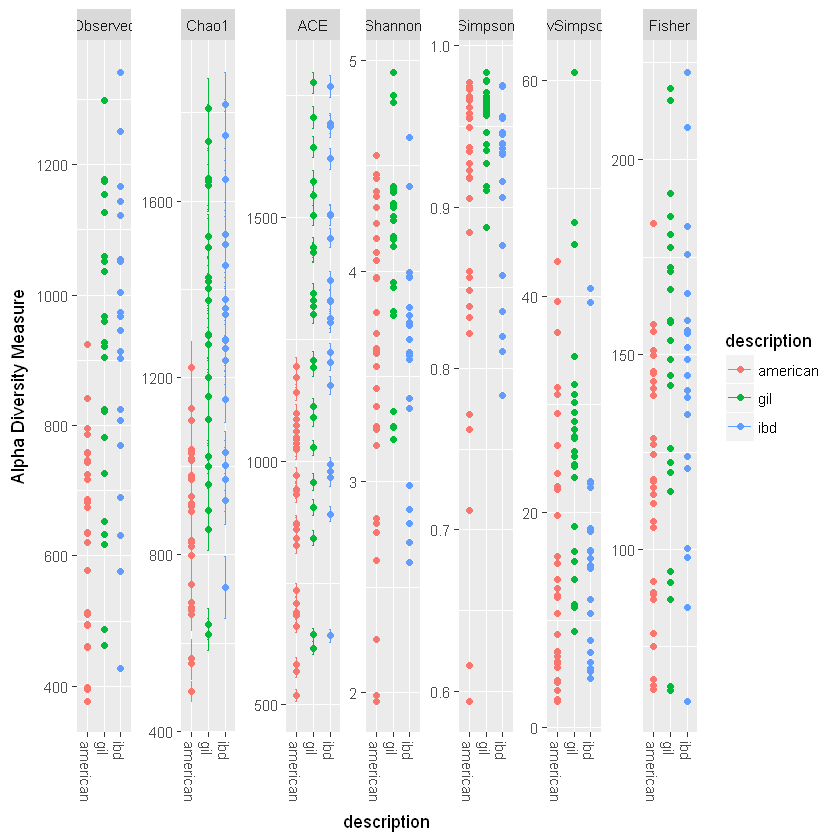

In [4]:
plot_richness(phylo, "description", color="description")

In [37]:
usa <- prune_species(speciesSums(phylo) > 0, phylo)

Warning message:
"'prune_species' is deprecated.
Use 'prune_taxa' instead.
See help("Deprecated") and help("phyloseq-deprecated")."Warning message:
"'speciesSums' is deprecated.
Use 'taxa_sums' instead.
See help("Deprecated") and help("phyloseq-deprecated")."

In [41]:
phylo

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10046 taxa and 74 samples ]
sample_data() Sample Data:       [ 74 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 10046 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 10046 tips and 10044 internal nodes ]

In [42]:
### microbiome library

In [5]:
america <- transform(phylo, "compositional")

In [6]:
america.core <- core(america, detection = .2/100, prevalence = 50/100)

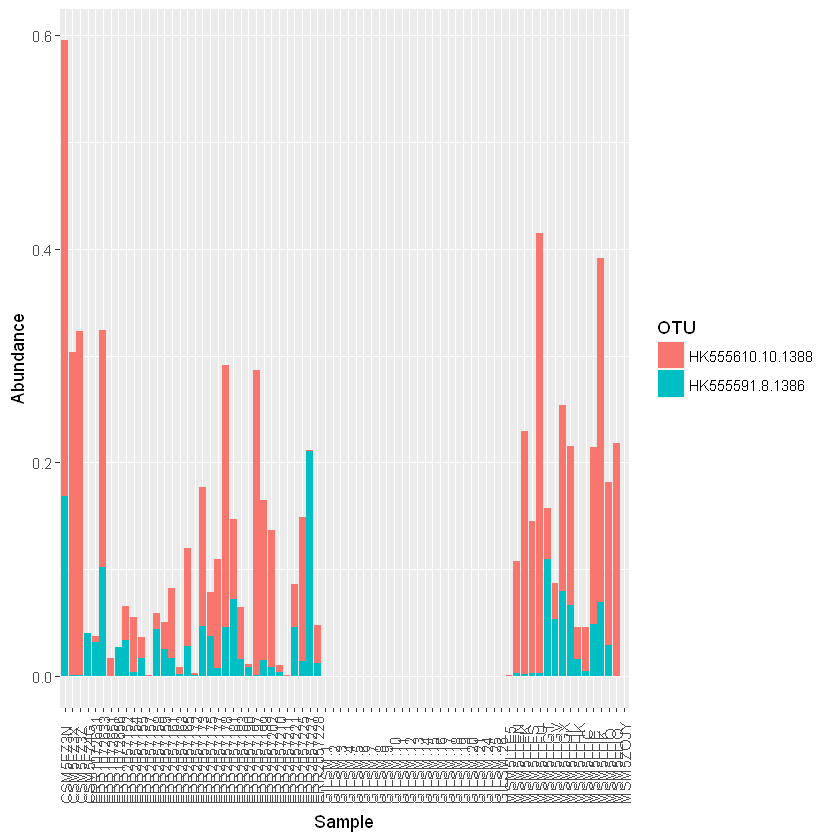

In [7]:
plot_composition(america.core, plot.type="barplot")

In [56]:
head(sample_data(phylo))

,SampleID,BarcodeSequence,LinkerPrimerSequence,FileInput,description
CSM5FZ3N,CSM5FZ3N,NA,NA,CSM5FZ3N.fasta,ibd
CSM5FZ3X,CSM5FZ3X,NA,NA,CSM5FZ3X.fasta,ibd
CSM5FZ3Z,CSM5FZ3Z,NA,NA,CSM5FZ3Z.fasta,ibd
CSM5FZ4G,CSM5FZ4G,NA,NA,CSM5FZ4G.fasta,ibd
ERR1072631,ERR1072631,NA,NA,ERR1072631.fasta,american
ERR1072633,ERR1072633,NA,NA,ERR1072633.fasta,american


In [57]:
head(tax_table(phylo))

,Kingdom,Phylum,Class,Order,Family,Genus,Species
DQ794326.1.1392,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Lachnospiraceae NC2004 group,s__uncultured bacterium
EU772937.1.1344,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium
EU778837.1.1369,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium
DQ794954.1.1392,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium
DQ794671.1.1393,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium
DQ800652.1.1393,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium


In [58]:
head(otu_table(phylo))

,CSM5FZ3N,CSM5FZ3X,CSM5FZ3Z,CSM5FZ4G,ERR1072631,ERR1072633,ERR1072651,ERR1072656,ERR2057152,ERR2057154,...,MSM5LLGV,MSM5LLGX,MSM5LLHI,MSM5LLHK,MSM5LLIC,MSM5LLIE,MSM5LLIK,MSM5LLIO,MSM5LLIQ,MSM5ZOJY
DQ794326.1.1392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EU772937.1.1344,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
EU778837.1.1369,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DQ794954.1.1392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DQ794671.1.1393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DQ800652.1.1393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
tmp <- otu_table(phylo)
head(tmp)

,CSM5FZ3N,CSM5FZ3X,CSM5FZ3Z,CSM5FZ4G,ERR1072631,ERR1072633,ERR1072651,ERR1072656,ERR2057152,ERR2057154,...,MSM5LLGV,MSM5LLGX,MSM5LLHI,MSM5LLHK,MSM5LLIC,MSM5LLIE,MSM5LLIK,MSM5LLIO,MSM5LLIQ,MSM5ZOJY
DQ794326.1.1392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EU772937.1.1344,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
EU778837.1.1369,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DQ794954.1.1392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DQ794671.1.1393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DQ800652.1.1393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
head(rownames(tmp))

[1] "DQ794326.1.1392" "EU772937.1.1344" "EU778837.1.1369" "DQ794954.1.1392"
[5] "DQ794671.1.1393" "DQ800652.1.1393"

In [62]:
rownames(tmp) <- tax_table(phylo)$Genus

ERROR: Error in tax_table(phylo)$Genus: $ operator is invalid for atomic vectors


In [63]:
tax <- tax_table(phylo)

In [75]:
rownames(tmp) <- tax[,6]

In [77]:
head(tmp)

,CSM5FZ3N,CSM5FZ3X,CSM5FZ3Z,CSM5FZ4G,ERR1072631,ERR1072633,ERR1072651,ERR1072656,ERR2057152,ERR2057154,...,MSM5LLGV,MSM5LLGX,MSM5LLHI,MSM5LLHK,MSM5LLIC,MSM5LLIE,MSM5LLIK,MSM5LLIO,MSM5LLIQ,MSM5ZOJY
g__Lachnospiraceae NC2004 group,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g__Blautia,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
g__Blautia,0,0,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g__Blautia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g__Blautia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
g__Blautia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
otu.relative <- abundances(america, "compositional")

(head(otu.relative))

,CSM5FZ3N,CSM5FZ3X,CSM5FZ3Z,CSM5FZ4G,ERR1072631,ERR1072633,ERR1072651,ERR1072656,ERR2057152,ERR2057154,...,MSM5LLGV,MSM5LLGX,MSM5LLHI,MSM5LLHK,MSM5LLIC,MSM5LLIE,MSM5LLIK,MSM5LLIO,MSM5LLIQ,MSM5ZOJY
DQ794326.1.1392,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,...,0,0.000000e+00,0,0,0,0,0,0,0,0
EU772937.1.1344,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,...,0,1.012956e-05,0,0,0,0,0,0,0,0
EU778837.1.1369,0,0,0,0,7.130125e-05,6.051437e-05,0,0,0,0,...,0,0.000000e+00,0,0,0,0,0,0,0,0
DQ794954.1.1392,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,...,0,0.000000e+00,0,0,0,0,0,0,0,0
DQ794671.1.1393,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,...,0,0.000000e+00,0,0,0,0,0,0,0,0
DQ800652.1.1393,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,...,0,0.000000e+00,0,0,0,0,0,0,0,0


In [84]:
topx <- top_taxa(america, n=10)

topx

[1] "HK555610.10.1388" "JN665074.1.1506"  "HK555591.8.1386"  "HK555587.11.1362"
 [5] "GQ898680.1.1477"  "EU773556.1.1338"  "DQ798009.1.1371"  "GQ493896.1.1380" 
 [9] "EF403447.1.1491"  "EF400344.1.1489"

In [86]:
head(get_taxa_unique(america, "Phylum"))

[1] "p__Firmicutes"      "p__Bacteroidetes"   "p__Synergistetes"  
[4] "p__Verrucomicrobia" "p__Actinobacteria"  "p__Tenericutes"

In [92]:
ord <- ordinate(phylo, "MDS")

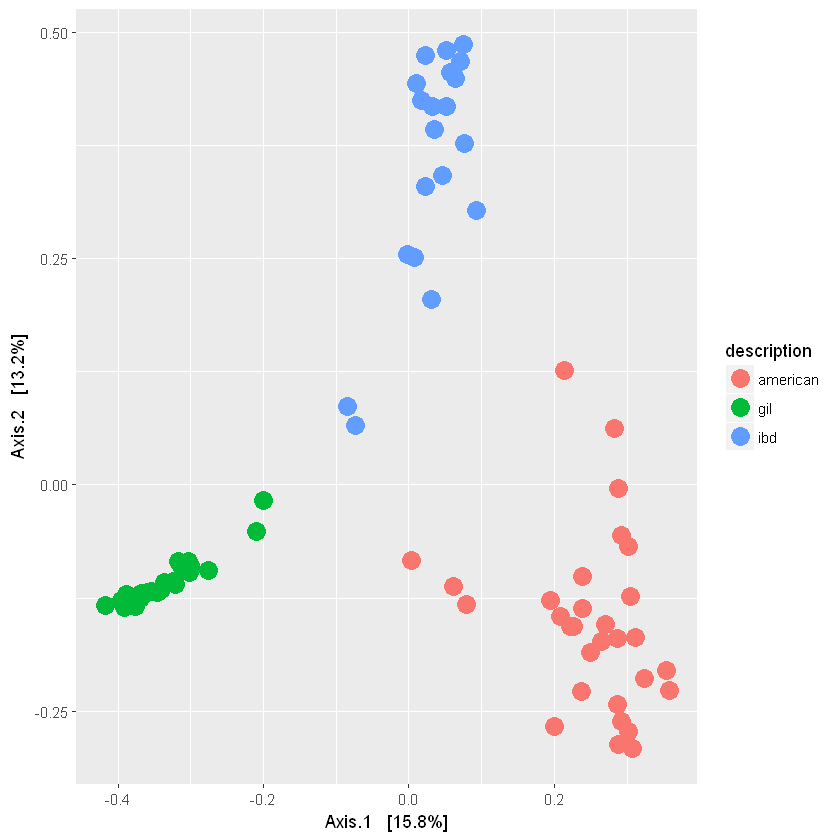

In [94]:
plot_ordination(phylo, ord, color = "description") +
                geom_point(size = 5)

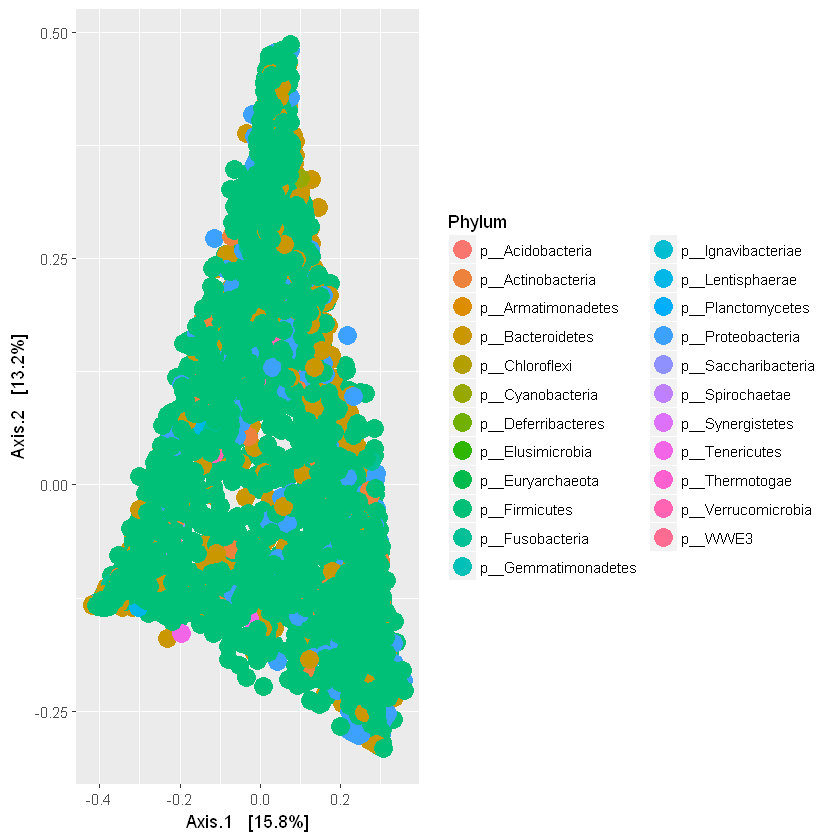

In [98]:
plot_ordination(phylo, ord, color = "Phylum", type="taxa") +
                geom_point(size = 5)

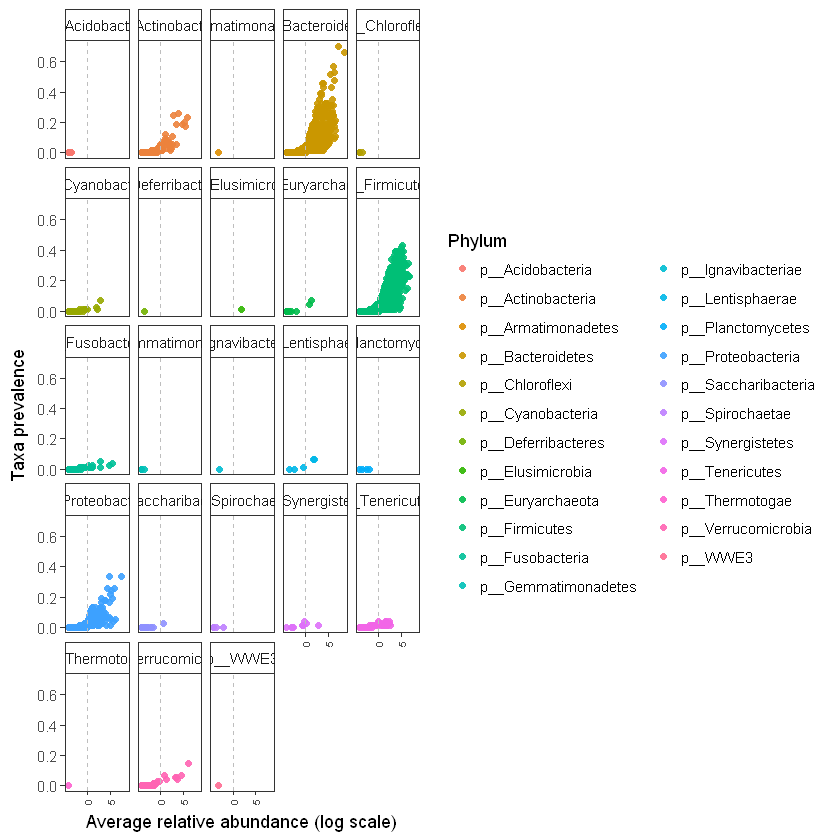

In [10]:
plot_taxa_prevalence(phylo, "Phylum", detection=10)

In [19]:
gil <- subset_samples(phylo, description == "gil")
american <- subset_samples(phylo, description == "american")
ibd <- subset_samples(phylo, description="ibd")

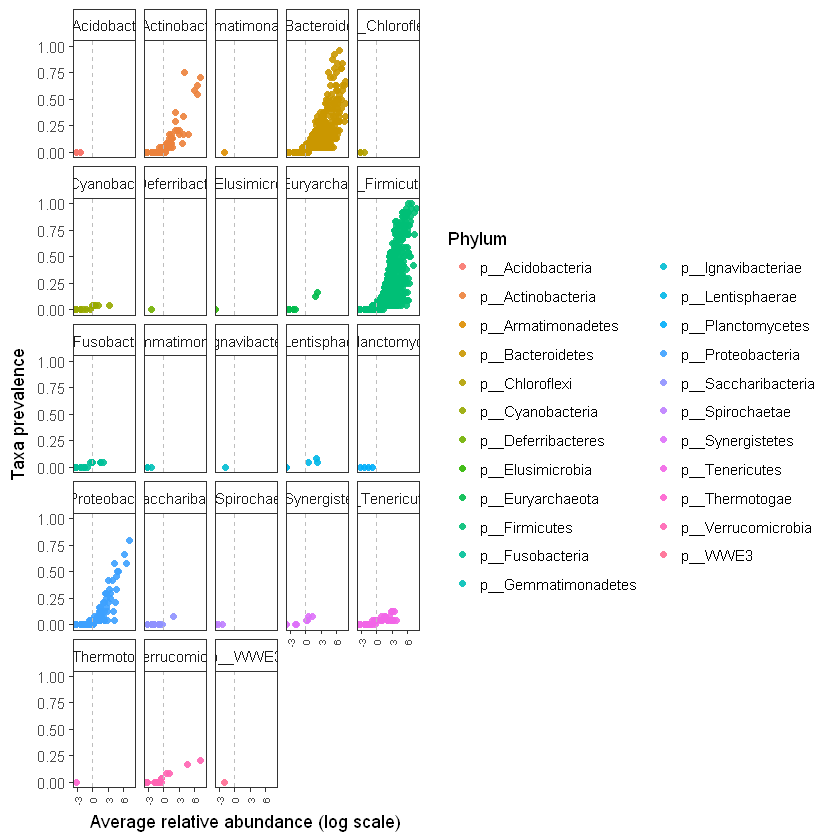

In [29]:
plot_taxa_prevalence(gil, "Phylum", detection=10)

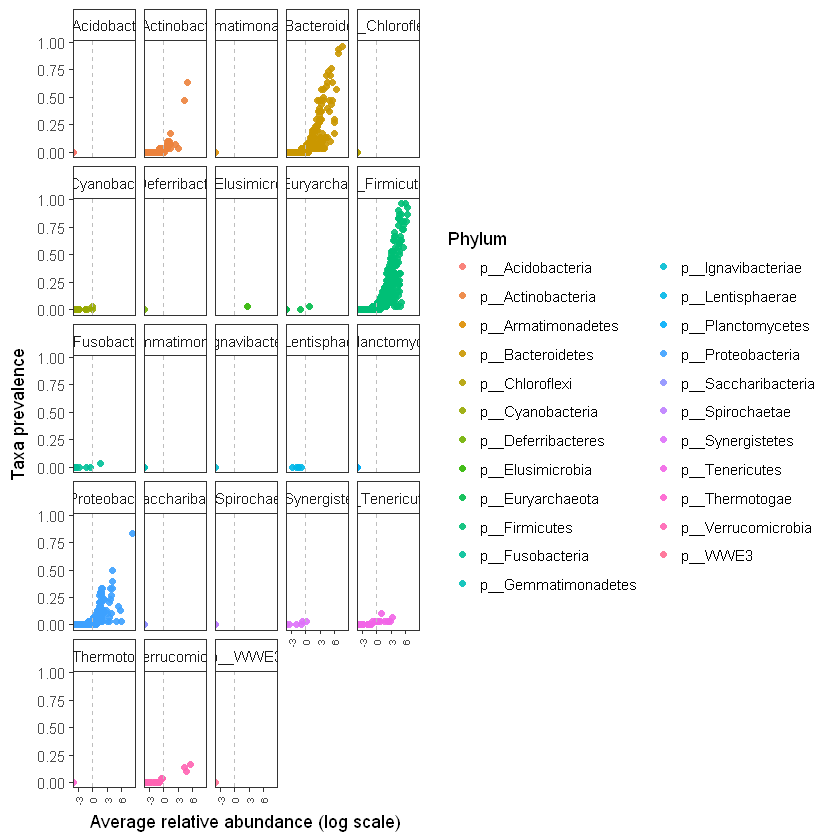

In [31]:
plot_taxa_prevalence(american, "Phylum", detection=10)

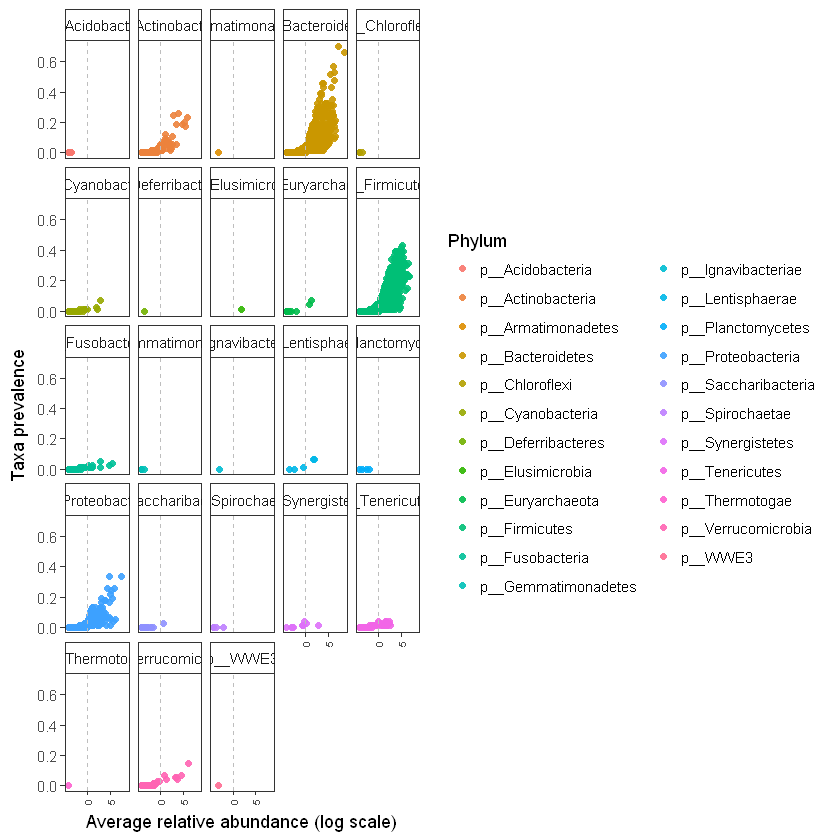

In [30]:
plot_taxa_prevalence(ibd, "Phylum", detection=10)

In [61]:
gil.2 <- prune_taxa(taxa_sums(gil) > 0, gil)

In [62]:
gil.2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4692 taxa and 24 samples ]
sample_data() Sample Data:       [ 24 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 4692 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4692 tips and 4690 internal nodes ]

In [63]:
gil.rel <- transform(gil.2, "compositional")

In [48]:
head(prevalence(gil.rel, detection =0, sort = TRUE, count = TRUE))

DQ819318.1.1377 DQ799333.1.1394 DQ800305.1.1380 DQ824162.1.1399 DQ807372.1.1409 
             24              24              24              24              24 
DQ823878.1.1392 
             24

In [41]:
core.taxa.standard <- core_members(gil.rel, detection = 0, prevalence = 50)

In [49]:
head(core.taxa.standard)

character(0)

In [43]:
gil.core <- core(gil.rel, detection = 0, prevalence = .5)

In [45]:
core.taxa <- taxa(gil.core)
class(core.taxa)
tax.mat <- tax_table(gil.core)
tax.df <- as.data.frame(tax.mat)

tax.df$OTU <- rownames(tax.df)
core.taxa.class <- dplyr::filter(tax.df, rownames(tax.df) %in% core.taxa)

head(core.taxa.class)

[1] "character"

Kingdom,Phylum,Class,Order,Family,Genus,Species,OTU
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium,DQ800652.1.1393
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium,DQ804685.1.1389
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium,DQ809699.1.1388
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium,DQ905421.1.1468
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium,EU462231.1.1388
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__uncultured bacterium,DQ809662.1.1394


In [50]:
top_taxa(gil, n=10)

[1] "DQ905741.1.1519" "EF403447.1.1491" "DQ824110.1.1395" "EF403722.1.1491"
 [5] "EF400344.1.1489" "EU531977.1.1448" "EF404835.1.1474" "DQ809284.1.1400"
 [9] "GQ159011.1.1484" "EF604198.1.1495"

In [58]:
gil.mat <- tax_table(gil)
tax.df <- as.data.frame(gil.mat)

tax.df$OTU <- rownames(tax.df)
tp.class <- dplyr::filter(tax.df, rownames(tax.df) %in% top_taxa(gil, n=10))
tp.class

Kingdom,Phylum,Class,Order,Family,Genus,Species,OTU
k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidales S24-7 group,g__uncultured bacterium,s__uncultured bacterium,DQ824110.1.1395
k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__uncultured bacterium,EU531977.1.1448
k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__uncultured bacterium,EF403447.1.1491
k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__uncultured bacterium,EF400344.1.1489
k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__uncultured bacterium,EF403722.1.1491
k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Prevotellaceae,g__Prevotella 9,s__uncultured bacterium,GQ159011.1.1484
k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacteriales,f__Enterobacteriaceae,g__Escherichia-Shigella,s__uncultured bacterium,EF604198.1.1495
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Faecalibacterium,s__uncultured bacterium,EF404835.1.1474
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Faecalibacterium,s__uncultured bacterium,DQ905741.1.1519
k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcaceae UCG-002,s__uncultured bacterium,DQ809284.1.1400
